#Import libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
print(tf.__version__)

2.7.0


#Load VGG19

In [2]:
vgg = tf.keras.applications.VGG19(include_top = False, weights = 'imagenet')
vgg.trainable = False

80150528/80134624 [==============================] - 1s 0us/step


In [20]:
for layer in vgg.layers:
  print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


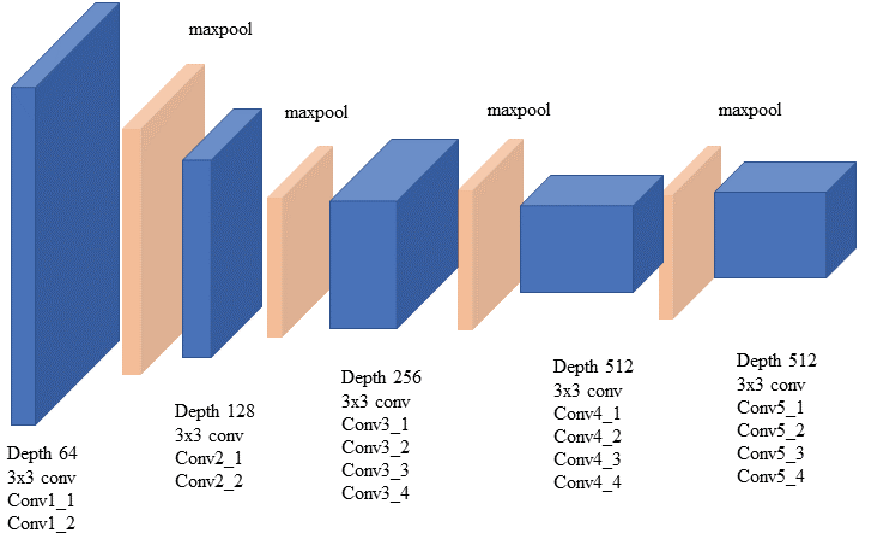

#List of outputs

In [23]:
list_of_ouputs = ['block1_conv2', 'block2_conv2', 'block3_conv2', 'block4_conv2', 'block5_conv2']


#Steps to build a model to get those outputs

In [24]:
outputs = []
for name in list_of_ouputs:
    outputs.append(vgg.get_layer(name).output)

In [25]:
outputs

[<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, None, None, 256) dtype=float32 (created by layer 'block3_conv2')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block4_conv2')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv2')>]

In [26]:
model = tf.keras.Model([vgg.input], outputs)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

#Look into the model

In [27]:
model.input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_1')>

In [28]:
model.output

[<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, None, None, 256) dtype=float32 (created by layer 'block3_conv2')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block4_conv2')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv2')>]

#Let's try with a random "image"

## A random "image"

In [10]:
import numpy

In [11]:
imarray = numpy.random.rand(1,100,100,3) * 255


Why the below line? Read [here](https://keras.io/api/applications/vgg/).

"Note: each Keras Application expects a specific kind of input preprocessing. For VGG19, call tf.keras.applications.vgg19.preprocess_input on your inputs before passing them to the model. vgg19.preprocess_input will convert the input images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset, without scaling."

In [12]:
preprocessed_input = tf.keras.applications.vgg19.preprocess_input(imarray)

In [13]:
print(preprocessed_input.shape)

(1, 100, 100, 3)


##Pass it through the model

In [29]:
output_of_the_model = model(preprocessed_input)

In [30]:
type(output_of_the_model)

list

In [31]:
len(output_of_the_model)

5

##Form a dictionary
key : value

key: name of the layer taken from VGG19
value: output of that layer when passing the image through the model

In [32]:
output_dict = {ouput_name:value 
                  for ouput_name, value 
                  in zip(list_of_ouputs, output_of_the_model)}

In [33]:
output_dict.keys()

dict_keys(['block1_conv2', 'block2_conv2', 'block3_conv2', 'block4_conv2', 'block5_conv2'])

In [35]:
print(output_dict['block1_conv2'].shape)

(1, 100, 100, 64)


In [17]:
print(output_dict['block4_conv2'].shape)

(1, 12, 12, 512)


In [18]:
print(output_dict['block5_conv2'].shape)

(1, 6, 6, 512)


In [38]:
for key in output_dict.keys():
  print(output_dict[key].shape)

(1, 100, 100, 64)
(1, 50, 50, 128)
(1, 25, 25, 256)
(1, 12, 12, 512)
(1, 6, 6, 512)
